In [72]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import plotly.express as px
import seaborn as sns

In [3]:
train = pd.read_csv('wine.csv')
test = pd.read_csv('wine_test.csv')

In [4]:
train.head()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1952,7.4950,600,17.1167,160,31,43183.569
1,1953,8.0393,690,16.7333,80,30,43495.030
2,1955,7.6858,502,17.1500,130,28,44217.857
3,1957,6.9845,420,16.1333,110,26,45152.252
4,1958,6.7772,582,16.4167,187,25,45653.805


In [9]:
train_y = train['Price']
train_x = train.drop(['Price'], axis=1)
predict_x = test.drop(['Price'], axis=1)
predict_y = test['Price']

In [49]:
# variables = ['WinterRain','HarvestRain']
Rain = pd.DataFrame(train_x, columns=['WinterRain', 'HarvestRain'])
model_H = LinearRegression().fit(Rain.values, train_y)
R2_H = model_H.score(Rain, train_y)
print('What is the "Multiple R-squared" value of your model?'+'\n'+str(R2_H))

What is the "Multiple R-squared" value of your model?
0.3177023676926104


In [65]:
model_H.coef_[1]
print('What is the coefficient of the "HarvestRain" variable?'+'\n'+str(np.format_float_scientific (model_H.coef_[1], precision=4)))

What is the coefficient of the "HarvestRain" variable?
-4.9710e-03


In [67]:
model_H.intercept_
print('What is the intercept of your model?'+'\n'+str(np.format_float_positional(model_H.intercept_, precision=4)))

What is the intercept of your model?
7.8653


,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
Year,1.000000,-0.447768,0.016970,-0.246916,0.028009,-1.000000,0.994485
Price,-0.447768,1.000000,0.136651,0.659563,-0.563322,0.447768,-0.466862
WinterRain,0.016970,0.136651,1.000000,-0.321091,-0.275441,-0.016970,-0.001622
AGST,-0.246916,0.659563,-0.321091,1.000000,-0.064496,0.246916,-0.259162
HarvestRain,0.028009,-0.563322,-0.275441,-0.064496,1.000000,-0.028009,0.041264
Age,-1.000000,0.447768,-0.016970,0.246916,-0.028009,1.000000,-0.994485
FrancePop,0.994485,-0.466862,-0.001622,-0.259162,0.041264,-0.994485,1.000000


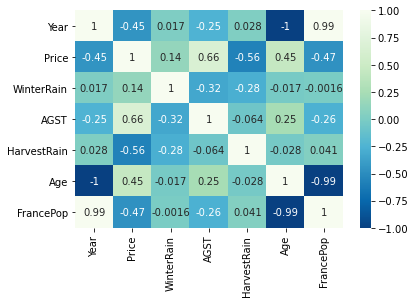

In [84]:
# correlation
sns.heatmap(train.corr(),annot=True, cmap='GnBu_r')
train.corr()

In [86]:
# prediction outcome
model = LinearRegression().fit(train_x, train_y)
R2 = model.score(train_x, train_y)
print(R2)
result = model.predict(predict_x)
r2_score(predict_y, result)

0.829359222329904


0.2120671905596211